# Proyecto bimestral Python

***

# Analisis del Datamart obtenido de Repelis24

   > Edwin Guamushig 

***

**1. `INTRODUCCION:`**

Los datos a utilizarse fueron obtenidos desde la pagina de repelis24, se puede acceder a la pagina dando clic [aqui.](https://repelis24.live/)


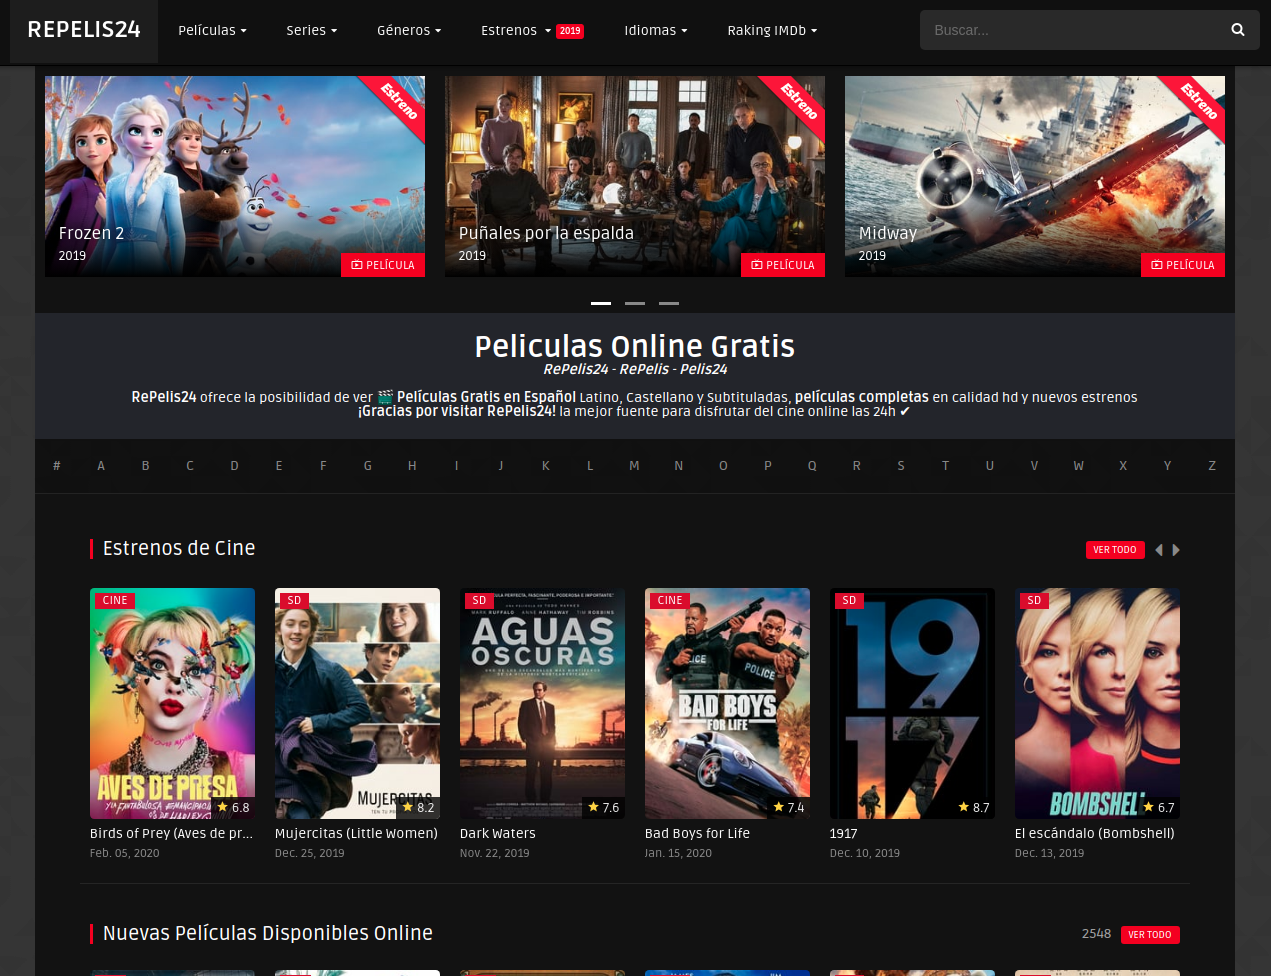



In [29]:
import pandas as pd
import os
import xlsxwriter
import matplotlib.pyplot as plt
import seaborn as sns

path_csv = './arania_peliculas/data/datos.csv'
path_guardar_pickle = 'pickle/datos_peliculas.pickle'


df = pd.read_csv(path_csv, nrows = 800)


## Mostramos el dataframe por el cual se va a realizar el analisis

Del siguiente dataframe analizaremos 800 filas y 7 columnas

In [30]:
df

Categoria  Anio  Comentarios  Likes  \
0                          Accion,Comedia,Crimen  2020            0      1   
1                              Animacion,Familia  2014            0      0   
2    Animacion,Comedia,Aventura,Fantasía,Familia  2019            0      0   
3                                 Drama,Aventura  2014            0      1   
4                               Documental,Drama  2014            0      0   
..                                           ...   ...          ...    ...   
795                                        Drama  2000            0      0   
796                        Accion,Drama,Suspense  1998            0      0   
797                     Romance,Comedia,Fantasía  1998            0      1   
798                        Romance,Comedia,Drama  1999            0      0   
799                                Drama,Romance  1999            0      0   

     Rating                                             Nombre  Views  
0       7.0  Aves de Presa (y la Fantabulosa Emancipacion d...  29134  
1       6.7                 Campanilla: Hadas y Piratas (2014)   1912  
2       7.0                 Mr. Link: El origen perdido (2019)   2209  
3       5.6                                         Noe (2014)   2520  
4       6.5                                       Manny (2014)   1208  
..      ...                                                ...    ...  
795     6.7                                   Tigerland (2000)    104  
796     6.9                             Enemigo publico (1998)    173  
797     6.5                         Practicamente magia (1998)    257  
798     7.2                                Notting Hill (1999)    158  
799     6.4                      Mejor que el chocolate (1999)    133  

[800 rows x 7 columns]

### Total de visitas por anio

In [31]:
total = df.groupby('Anio')['Views'].sum().reset_index()
total = total.astype(int)
total.columns = ['anio','vistas']
total

anio  vistas
0   1951      75
1   1988     455
2   1998     715
3   1999    2487
4   2000    7078
5   2001    4724
6   2002    7107
7   2003    7102
8   2004   11086
9   2005   14865
10  2006   21637
11  2007    7688
12  2008    7186
13  2009   10088
14  2010   12254
15  2011   16742
16  2012   12181
17  2013   28793
18  2014   30253
19  2015    2831
20  2019    2518
21  2020   35372

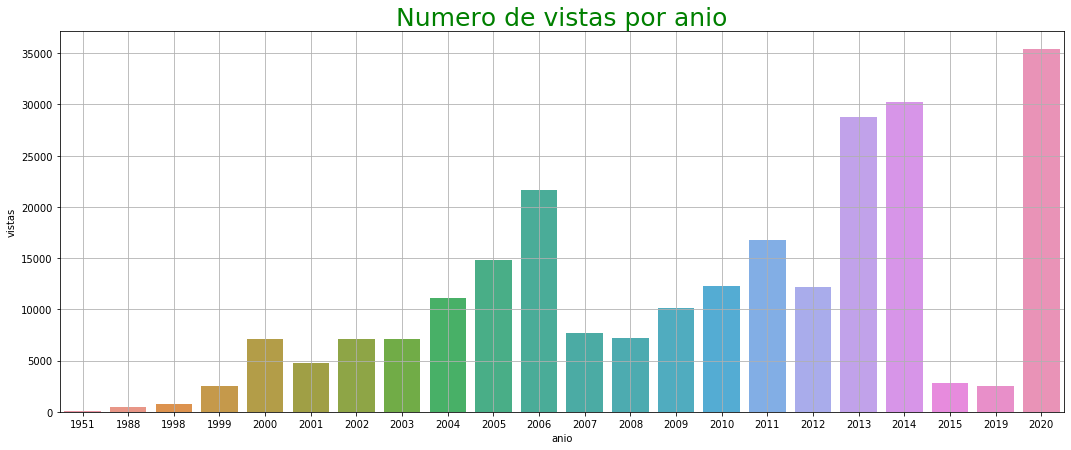

In [32]:
plt.figure(figsize=(18,7))
sns.barplot(total['anio'],total['vistas'])
plt.grid(True)
plt.title('Numero de vistas por anio', color='g', size = 25)
plt.show()


### 5 Peliculas con mas vistas

In [33]:
peliculas =  df.groupby('Nombre')['Views'].sum().reset_index()
peliculas.columns = ['Nombre','Visitas']
peliculas = peliculas.sort_values(by = 'Visitas', ascending = False)
peliculas = peliculas[:5]
peliculas

Nombre  Visitas
53   Aves de Presa (y la Fantabulosa Emancipacion d...    29134
415           Las aventuras del Doctor Dolittle (2020)     6238
535                                         Noe (2014)     2520
514                 Mr. Link: El origen perdido (2019)     2209
94                  Campanilla: Hadas y Piratas (2014)     1912

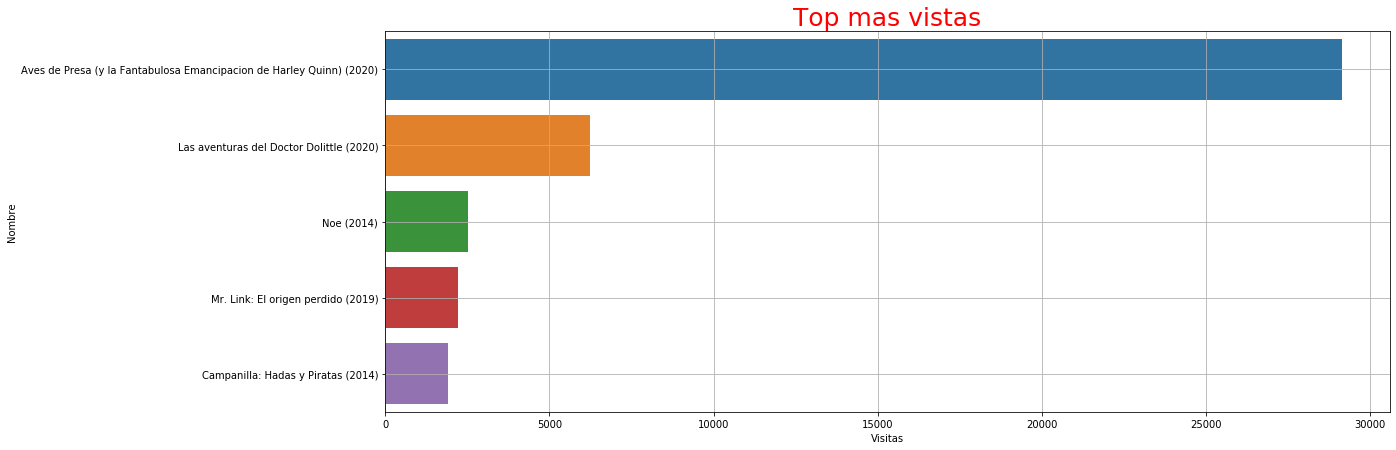

In [34]:
plt.figure(figsize=(18,7))
sns.barplot(y = peliculas['Nombre'], x = peliculas['Visitas'])
plt.grid(True)
plt.title('Top mas vistas', color='r', size = 25)
plt.show()

### 5 Peliculas menos vistas

In [43]:
peliculas_n =  df.groupby('Nombre')['Views'].sum().reset_index()
peliculas_n.columns = ['Nombre','Visitas']
peliculas_n = peliculas_n.sort_values(by = 'Visitas', ascending = True)
peliculas_n = peliculas_n[:5]
peliculas_n

Nombre  Visitas
19   Alvin and the Chipmunks: The Valentines Collec...       20
758      Urbanized (el disenio de las ciudades) (2011)       22
67                     Bienvenidos a Collinwood (2002)       23
316                               I'm not there (2007)       25
60                                 Bala mordida (2009)       26

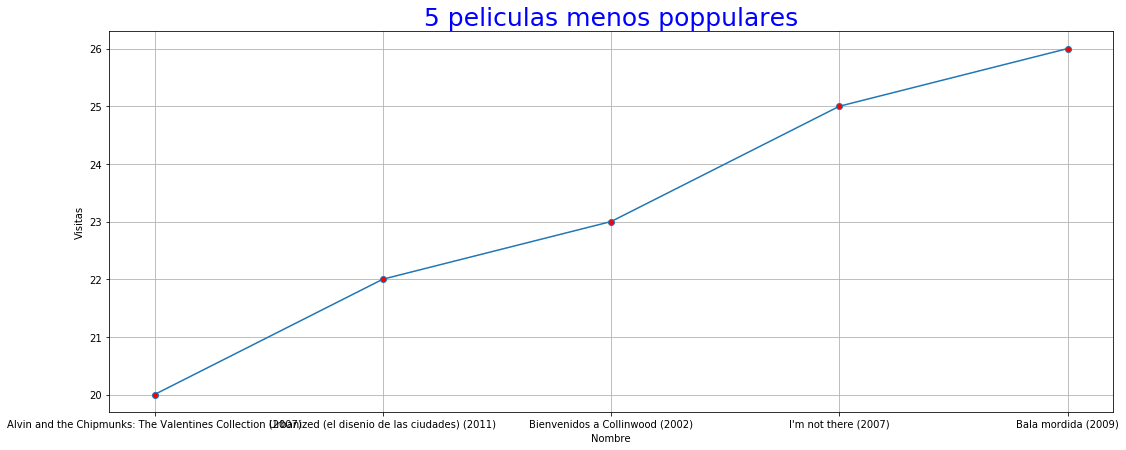

In [44]:
plt.figure(figsize=(18,7))
plt.plot(peliculas_n['Nombre'], peliculas_n['Visitas'],  linestyle='-', marker='o',  markerfacecolor='red')
plt.grid(True)
plt.xlabel('Nombre')
plt.ylabel('Visitas') 
plt.title('5 peliculas menos poppulares', color='b', size = 25)
plt.show()

### Peliculas por anio

In [47]:
peliculas_anio = df.groupby('Anio')['Nombre'].sum().reset_index()
peliculas_anio.columns = ['Anio','Nombre']
peliculas_anio = peliculas_anio.groupby('Anio')['Nombre'].sum().reset_index()
peliculas_anio

Anio                                             Nombre
0   1951                       Ultimatum a la Tierra (1951)
1   1988                                     Juliana (1988)
2   1998  American History X (1998)Enemigo publico (1998...
3   1999  La chica de al lado (1999)Pantaleon y las visi...
4   2000  Get Carter (Asesino implacable) (2000)Requiem ...
5   2001  Amor ciego (2001)Ichi the Killer (2001)Princes...
6   2002  La habitacion del panico (2002)Quiero ser como...
7   2003  Freddy contra Jason (2003)Memories of Murder (...
8   2004  Bridget Jones: sobrevivire (2004)Million Dolla...
9   2005  Rosas rojas (2005)Herbie: A tope (2005)Amor en...
10  2006  Noche en el museo (2006)Cartas desde Iwo Jima ...
11  2007  Disturbia (2007)88 minutos (2007)Hostel 2 (200...
12  2008  Siete almas (2008)Horton (2008)Jumper (2008)Mi...
13  2009  Push (2009)Exorcismo en Connecticut (2009)La t...
14  2010  Secretariat (2010)Saint (2010)RED (2010)Tropa ...
15  2011  Michael Jackson: La vida de un idolo (2011)El ...
16  2012  Looper (2012)The Hunt (2012)El alucinante mund...
17  2013  La leyenda de Ragnarok (2013)Rompenieves (2013...
18  2014  Campanilla: Hadas y Piratas (2014)Noe (2014)Ma...
19  2015  Kill Me Three Times (2015)Mientras seamos jove...
20  2019  Mr. Link: El origen perdido (2019)Richard Jewe...
21  2020  Aves de Presa (y la Fantabulosa Emancipacion d...

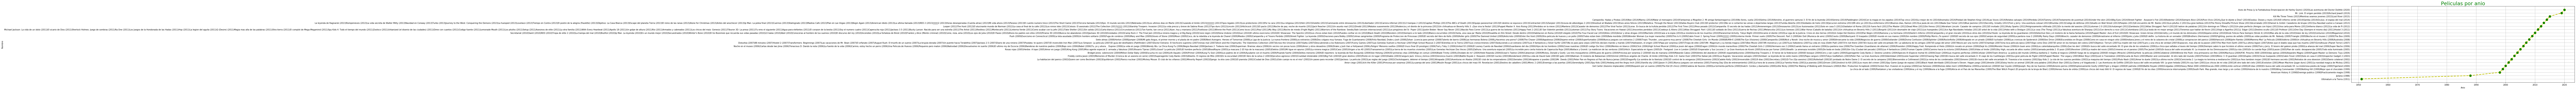

In [59]:
plt.figure(figsize=(20,7))
plt.grid(True)
plt.plot(peliculas_anio['Anio'],peliculas_anio['Nombre'] , color='y', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='g', markersize=12) 
plt.xlabel('Anio')
plt.ylabel('Nombre')
plt.title('Peliculas por anio', color='g', size = 25)
plt.show()


### Peliculas con menos subidas

In [65]:
peliculas_anios = df['Categoria'].value_counts().reset_index()
peliculas_anios.columns = ['Categoria', '# Remakes']
peliculas_anios = peliculas_anios[-10:]
peliculas_anios

Categoria  # Remakes
352   Fantasía,Comedia,Familia,Aventura          1
353       Accion,Aventura,Familia,Drama          1
354  Familia,Animacion,Romance,Fantasía          1
355     Cienciaficcion,Suspense,Romance          1
356           Romance,Animacion,Familia          1
357          Fantasía,Animacion,Familia          1
358        Drama,Romance,Cienciaficcion          1
359     Aventura,Comedia,Drama,Fantasía          1
360             Suspense,Misterio,Drama          1
361               Drama,Familia,Comedia          1

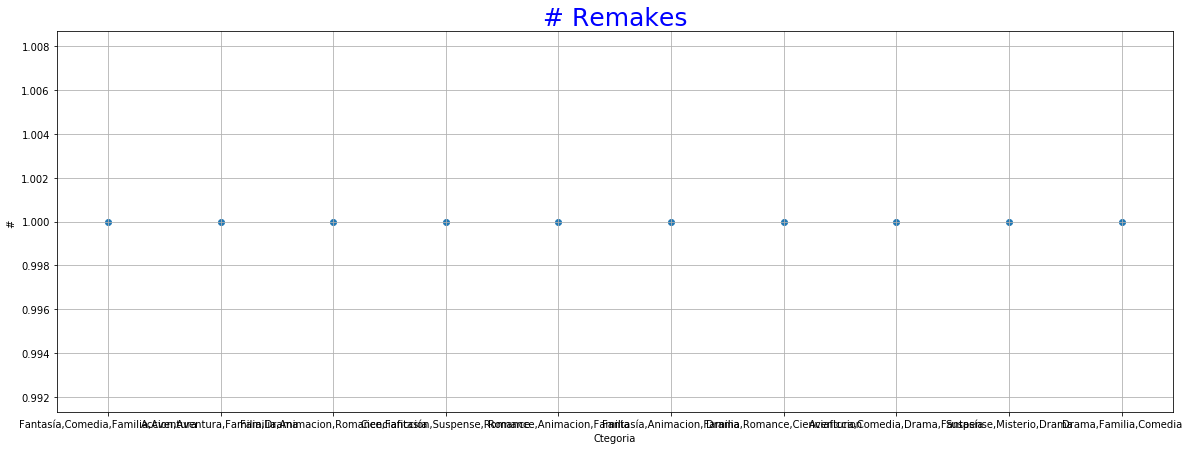

In [67]:
plt.figure(figsize=(20,7))
plt.grid(True)
plt.scatter(peliculas_anios['Categoria'], peliculas_anios['# Remakes'])
plt.xlabel('Ctegoria')
plt.ylabel('# ')
plt.title('# Remakes', color='b', size = 25)
plt.show()

### Promedio de rating utimos 10 anios

In [71]:
promedio_vistas = df.groupby("Anio")["Rating"].mean().reset_index()
promedio_vistas["Anio"] = promedio_vistas["Anio"].astype(int)
promedio_vistas.columns = ['Anio', 'Rating']
promedio_vistas = promedio_vistas[-10:]
promedio_vistas

Anio    Rating
12  2008  6.354545
13  2009  6.326531
14  2010  6.428986
15  2011  6.278409
16  2012  6.001852
17  2013  6.043210
18  2014  6.393548
19  2015  5.800000
20  2019  7.250000
21  2020  6.700000

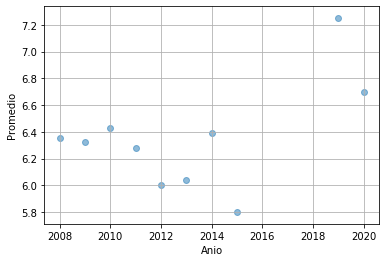

In [73]:
fig, ax = plt.subplots()
ax.scatter(promedio_vistas['Anio'], promedio_vistas['Rating'], alpha=0.5)
# plt.plot(promedio_asistencia['Anio'], promedio_asistencia['Promedio'], 'r^')
# plt.title('Promedio de asistencia', color='b', size = 25)
plt.xlabel('Anio')
plt.ylabel('Promedio')
ax.grid(True)
plt.show()

### Peliculas

In [78]:
pelis = df.groupby('Rating')['Categoria'].count().reset_index().sort_values(by="Rating",ascending=False)
pelis.columns = ['Rating', 'Categoria']   
pelis = pelis[:10]
pelis

Rating  Categoria
53     8.6          1
52     8.5          1
51     8.4          2
50     8.3          2
49     8.2          2
48     8.1          4
47     8.0          3
46     7.9          9
45     7.8          9
44     7.7         13

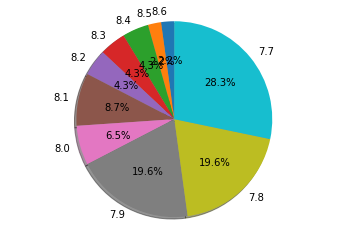

In [92]:
labels = pelis['Rating']
labels.to_string()
fig1, ax1 = plt.subplots()
ax1.pie(pelis['Categoria'], labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

### Peliculas mejor rankeadas

In [95]:
top = df['Rating'].sort_values(ascending=False).head(20)
pelis_rating = df.loc[top.index,['Categoria', 'Nombre', 'Rating']]
pelis_rating = pelis_rating[:10]
pelis_rating

Categoria  \
750                     Drama,Familia   
304                     Comedia,Drama   
692                      Drama,Crimen   
794                             Drama   
248                   Familia,Comedia   
691                             Drama   
29   Animacion,Drama,Familia,Fantasía   
454           Drama,Misterio,Suspense   
614      Cienciaficcion,Drama,Romance   
305                        Documental   

                                           Nombre  Rating  
750                                Juliana (1988)     8.6  
304             Cheila, una casa pa’ Maita (2010)     8.5  
692                         Ciudad de Dios (2002)     8.4  
794                     American History X (1998)     8.4  
248                                Lotoman (2011)     8.3  
691                            El pianista (2002)     8.3  
29                         Los ninios lobo (2012)     8.2  
454          El truco final (El prestigio) (2006)     8.2  
614                       ¡Olvidate de mi! (2004)     8.1  
305  Pesadilla en Elm Street: Desde dentro (2010)     8.1

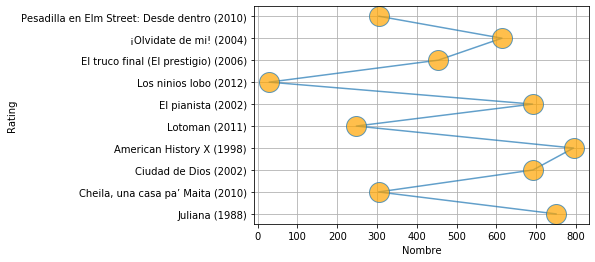

In [97]:
fig, ax = plt.subplots()
ax.plot(pelis_rating['Nombre'], '-o', ms=20, alpha=0.7, mfc='orange')
ax.grid()
plt.xlabel('Nombre')
plt.ylabel('Rating')
plt.show()

### Peliculas peor rating

In [104]:
peliculas_rating =  df.groupby('Nombre')['Rating'].sum().reset_index()
peliculas_rating.columns = ['Nombre','Rating']
peliculas = peliculas_rating.sort_values(by = 'Rating', ascending = False)
peliculas_rating = peliculas_rating[:10]
peliculas_rating

Nombre  Rating
0                          12 trampas 2 (2013)     5.5
1                              22 balas (2010)     6.5
2                               28 dias (2000)     6.0
3                     50 primeras citas (2004)     6.8
4                            88 minutos (2007)     5.7
5                                9 dias (2002)     5.4
6                                  Abel (2010)     6.7
7  Abraham Lincoln: Cazador de vampiros (2012)     5.6
8                            Acorralado (2013)     5.7
9                   Across the Universe (2007)     7.2

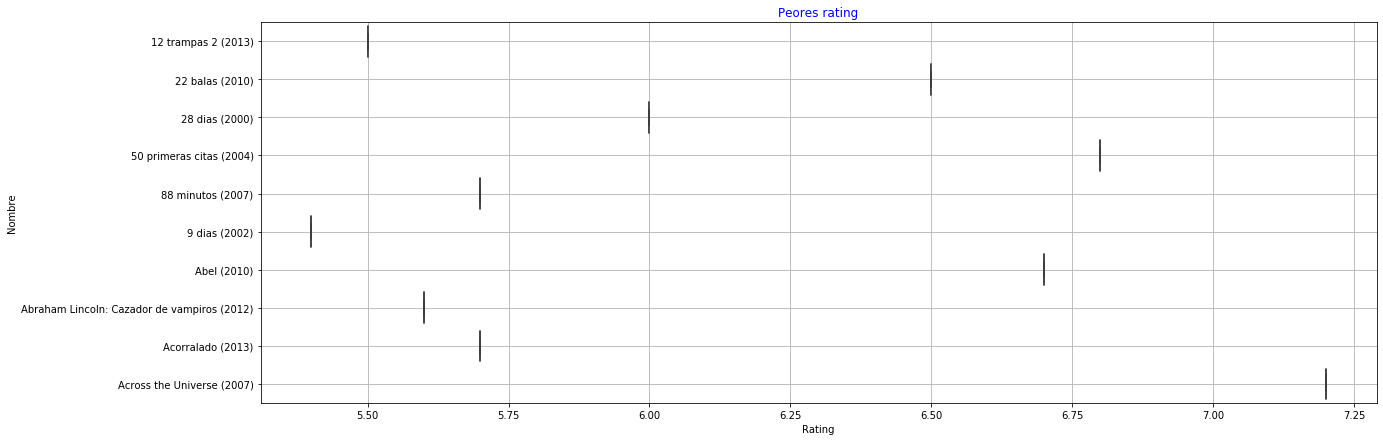

In [107]:
plt.figure(figsize=(20,7))
sns.boxplot(y=peliculas_rating["Nombre"],
            x=peliculas_rating["Rating"])
plt.grid(True)
plt.title("Peores rating",color='b')
plt.show()

### Videos con mas dislikes

In [114]:
top_videos = df['Likes'].sort_values(ascending=True).head(15)
dislikes = df.loc[top_videos.index,['Categoria','Nombre', 'Likes', 'Anio']]
dislikes

Categoria  \
399          Accion,Aventura,Comedia,Suspense   
506                   Accion,Aventura,Comedia   
507                  Fantasía,Comedia,Familia   
508                             Drama,Romance   
509  Accion,Aventura,Animacion,Cienciaficcion   
510                                    Terror   
511                     Comedia,Drama,Romance   
512                             Drama,Romance   
513                      Cienciaficcion,Drama   
514                  Accion,Aventura,Fantasía   
515                     Crimen,Drama,Suspense   
516                    Terror,Accion,Suspense   
517                           Aventura,Accion   
518                  Misterio,Suspense,Accion   
519                           Fantasía,Accion   

                                                Nombre  Likes  Anio  
399                          Negocios de guerra (2008)      0  2008  
506                     Una loca pelicula epica (2007)      0  2007  
507                              Sigo como Dios (2007)      0  2007  
508           El amor en los tiempos del colera (2007)      0  2007  
509                            Objetivo: Terrum (2007)      0  2007  
510                            La madre del mal (2007)      0  2007  
511                  Lars y una chica de verdad (2007)      0  2007  
512            Expiacion, mas alla de la pasion (2007)      0  2007  
513                          The Man from Earth (2007)      0  2007  
514                            La ultima legion (2007)      0  2007  
515     Antes que el diablo sepa que has muerto (2007)      0  2007  
516                  Grindhouse (Planet Terror) (2007)      0  2007  
517  Indiana Jones y el reino de la calavera de cri...      0  2008  
518                  La conspiracion del panico (2008)      0  2008  
519                                     Hancock (2008)      0  2008

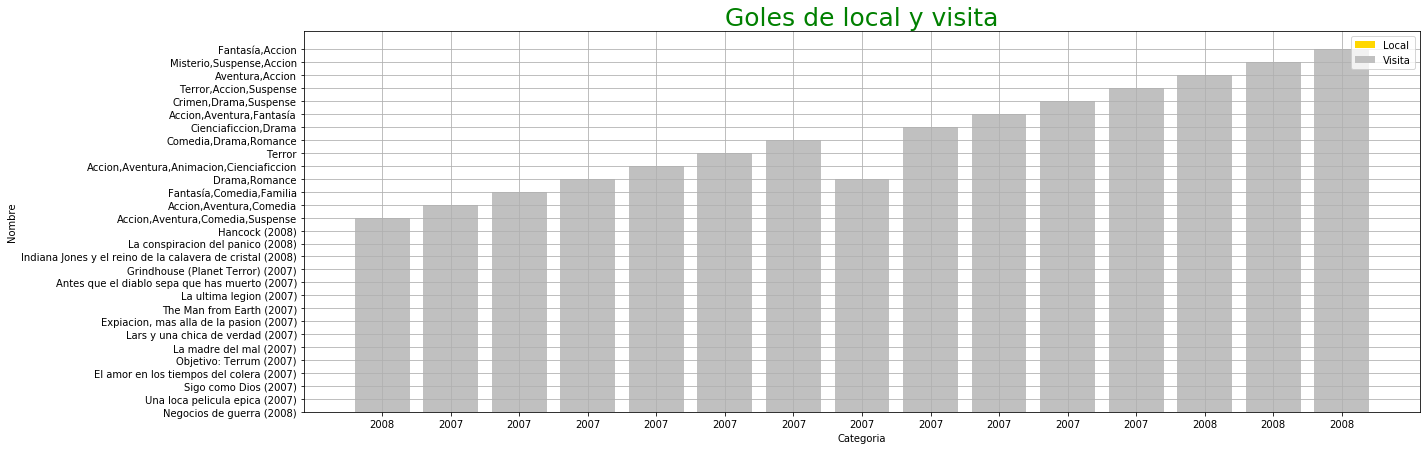

In [117]:
plt.figure(figsize=(20,7))
plt.grid(True)

ind = [x for x, _ in enumerate(dislikes['Anio'])]

plt.bar(ind, dislikes['Nombre'], width=0.8, label='Local', color='gold', bottom=0)
plt.bar(ind, dislikes['Categoria'], width=0.8, label='Visita', color='silver', bottom=0)

plt.xticks(ind, dislikes['Anio'])
plt.ylabel('Nombre')
plt.xlabel('Categoria')
plt.legend(loc='upper right')
plt.title('Goles de local y visita', color='g', size = 25)

plt.show()